    Outlook Temperature Humidity    Wind Play Tennis
0     Sunny         Hot     High    Weak          No
1     Sunny         Hot     High  Strong          No
2  Overcast         Hot     High    Weak         Yes
3      Rain        Mild     High    Weak         Yes
4      Rain        Cool   Normal    Weak         Yes
Confusion Matrix:
[[1 0]
 [0 2]]

Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Actual vs Predicted States:
  Actual Predicted
0    Yes       Yes
1    Yes       Yes
2     No        No


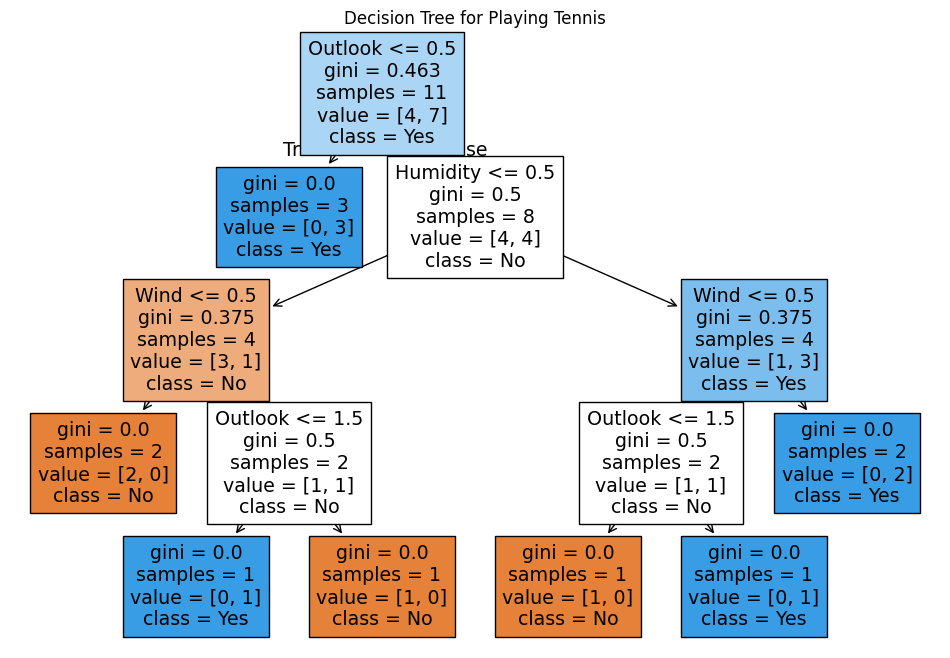


Based on the input, the model predicts: Will Play Tennis? Yes


C:\Users\nasee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt


data = pd.read_csv('PlayTennis.csv')


print(data.head())


label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


X = data[['Outlook', 'Temperature', 'Humidity', 'Wind']] 
y = data['Play Tennis'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


predicted_states_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})


predicted_states_df['Actual'] = predicted_states_df['Actual'].map({0: 'No', 1: 'Yes'})
predicted_states_df['Predicted'] = predicted_states_df['Predicted'].map({0: 'No', 1: 'Yes'})

print("\nActual vs Predicted States:")
print(predicted_states_df.reset_index(drop=True))


plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree for Playing Tennis')
plt.show()


sample_input = [[0, 1, 0, 1]]  
prediction = model.predict(sample_input)


play_decision = 'Yes' if prediction[0] == 1 else 'No'
print(f"\nBased on the input, the model predicts: Will Play Tennis? {play_decision}")